In [2]:
import meep as mp
from meep.materials import Au, SiO2

Square lattice holes in Au
a = 575nm
slab thickness = 1um
width of bottom circle (take this as radius) = 150nm
h = 325nm
boundary conditions in x and y directions
PML on top and bottom of simulation cell
let's tke the pml to be 0.25a  
and another 0.25a between pml and top of gold slab

Incident light, try Hy and Ey

In [3]:
Drude_Au = mp.Medium(
    epsilon=9,
    E_susceptibilities=[mp.DrudeSusceptibility(frequency=2155, gamma=18.36)]
    )

In [14]:

radius = 0.2353
height = 0.2646
slab_depth = 1
dpml = 0.25
buffer = 1
total = dpml + buffer + slab_depth + dpml
pml_layers = [mp.PML(dpml, direction=mp.Z)]

cell = mp.Vector3(1, 1, total)
blk = mp.Block(
    size=mp.Vector3(1, 1, slab_depth),
    center=mp.Vector3(0,0,-slab_depth/2.0),
    material=Drude_Au
)
cyl = mp.Cylinder(
    radius=radius,
    height=height,
    center=mp.Vector3(0,0,height/2.0),
    material=Drude_Au
)
geometry= [blk, cyl]
resolution=16

fcen = 0.25  # pulse center frequency
df = 0.8   # pulse freq. width: large df = short impulse
scen = mp.Vector3(0,0,height)
s = [mp.Source(
    src=mp.GaussianSource(fcen, fwidth=df),
    component=mp.Hz,
    center=scen)]
    
sim = mp.Simulation(cell_size=cell,
                geometry=geometry,
                boundary_layers=pml_layers,
                sources=s,
                resolution=resolution,
                )

In [5]:
kx, ky, kz = 0.5,0,0
sim.k_point = mp.Vector3(kx, ky, kz)

sim.run(mp.after_sources(mp.Harminv(mp.Hz, scen, fcen, df)), until_after_sources=300)

-----------
Initializing structure...
time for choose_chunkdivision = 9.29832e-05 s
Working in 3D dimensions.
Computational cell is 1 x 1 x 2.5 with resolution 32
     block, center = (0,0,-0.5)
          size (1,1,1)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (9,9,9)
     cylinder, center = (0,0,0.1323)
          radius 0.2353, height 0.2646, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (9,9,9)
time for set_epsilon = 0.84391 s
drude susceptibility: frequency=2155, gamma=18.36
-----------
Meep: using complex fields.
Meep progress: 7.71875/320.0 = 2.4% done in 4.0s, 161.9s to go
on time step 494 (time=7.71875), 0.0081027 s/step
Meep progress: 17.75/320.0 = 5.5% done in 8.0s, 136.4s to go
on time step 1136 (time=17.75), 0.00623897 s/step
Meep progress: 28.015625/320.0 = 8.8% done in 12.0s, 125.2s to go
on time step 1793 (time=28.0156), 0.00609515 s/step
Meep progress: 38.265625/320.0 = 12.0% done in 16.0s, 117.9s to go
on 

In [18]:
# sim.restart_fields()
k_points = [
    mp.Vector3(0,0,0), #Gamma
    mp.Vector3(0,0.5,0), # X
    mp.Vector3(0.5,0.5,0), # M 
    mp.Vector3(0,0,0) # Gamma
]
k_points = mp.interpolate(10, k_points)
all_freqs = sim.run_k_points(300, k_points)


Meep progress: 111.84375/312.5 = 35.8% done in 4.0s, 7.2s to go
on time step 3579 (time=111.844), 0.00111776 s/step
Meep progress: 245.0/312.5 = 78.4% done in 8.0s, 2.2s to go
on time step 7841 (time=245.031), 0.000938566 s/step
harminv34:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv34:, 0.35326804512607257, 0.0025392125215631667, -69.56252029440154, 0.14409743438005745, -0.05622465229495159+0.1326757666992234i, 1.924137425739376e-08+0.0i
harminv34:, 0.4122423101714017, 0.003648428089809015, -56.495879872608576, 0.3753981507572154, 0.32598141526089847-0.1861716640534716i, 3.697559254348444e-10+0.0i
harminv34:, 0.4867211801148968, 0.0009447750904032593, -257.58573921924057, 0.05429415321910677, -0.053943069803707236+0.006164437843973407i, 2.150851875960547e-07+0.0i
harminv34:, 0.5031270161379054, -0.0019394938872643582, 129.70574938175298, 0.33299867612935713, -0.18018657372820224+0.28003734920898604i, 2.8646202453587187e-07+0.0i
harminv34:, 0.5383052797775683, 0.00222596

KeyboardInterrupt: 

In [8]:
from matplotlib import pyplot as plt
import numpy as np

/Users/kaustav/miniconda3/envs/mp/lib/python3.9/site-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


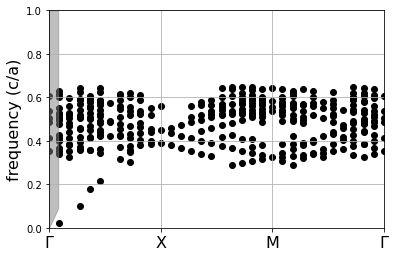

In [25]:
fig, ax = plt.subplots()
freqs = all_freqs
x = range(len(freqs))
# Plot bands
# Scatter plot for multiple y values, see https://stackoverflow.com/a/34280815/2261298
for xz, z in zip(x, freqs):
    for freq in z:
        ax.scatter([xz], freq , color='black')

ax.set_ylim([0, 1])
ax.set_xlim([x[0], x[-1]])

line = np.arange(0,10,0.01)
ax.fill_between(line,line/10.0 , 1.0, interpolate=True, color='gray', alpha = 0.5)

points_in_between = (len(freqs) - 4) / 3
tick_locs = [i*points_in_between+i for i in range(4)]
tick_labs = ['Γ', 'X', 'M', 'Γ']
ax.set_xticks(tick_locs)
ax.set_xticklabels(tick_labs, size=16)
ax.set_ylabel('frequency (c/a)', size=16)
ax.grid(True)

plt.show()

In [23]:
print(x)

range(0, 34)


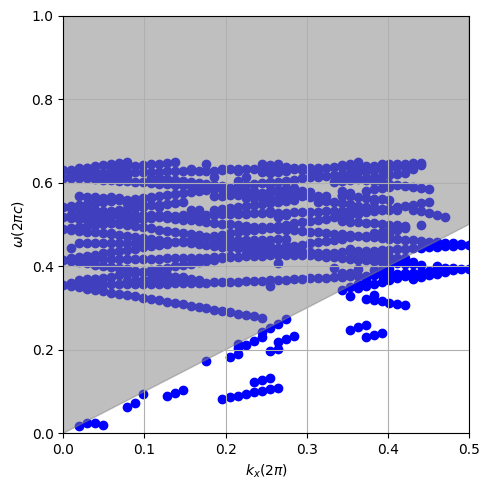

In [10]:
kx = [k.x for k in k_points]
fig = plt.figure(dpi=100,figsize=(5,5))
ax = plt.subplot(111)
for i in range(len(all_freqs)):
    for ii in range(len(all_freqs[i])):
        plt.scatter(kx[i],np.real(all_freqs[i][ii]),color='b')

ax.fill_between(kx, kx, 2.0, interpolate=True, color='gray', alpha = 0.5)
plt.xlim(0,0.5)
plt.ylim(0,1)
plt.grid(True)
plt.xlabel('$k_x(2\pi)$')
plt.ylabel('$\omega(2\pi c)$')
plt.tight_layout()
plt.show()